# Analysis of the behavior of the model

## Sensitivity Analysis

In this notebook, we study the influence of the parameters on maize mechanics.

## Parameters

There are several groups of parameters
* Root mechanics (stalk stiffness, plant height and mass)
* Number of whorl roots
* Whorl configuration: Stem vs root diameter, root number per whorl
* Brace root parameters: angle, length, height, spread width

## Imports

In [1]:
from math import cos, sin, degrees, radians
from itertools  import product

import numpy as np
from scipy.stats import linregress
import pandas as pd

from braceroot import brace_root, mechanic
from braceroot.brace_root import whorls

In [2]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.pylab import plot

In [11]:
def plot_surface(df):

    cols = df.columns
    X = cols[0]
    Y = cols[1]
    Z = cols[2]

    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.plot_trisurf(df[X], df[Y], df[Z], 
                    cmap=plt.cm.viridis, linewidth=0.01)
    ax.set_xlabel(X)
    ax.set_ylabel(Y)
    ax.set_zlabel(Z)

    

# Test the linear elasticity of the model

In [4]:
br0 = whorls(whorl=(0,0,0))

angles = []
winds = list(range(0,100,10))
for wind in winds:
    a = mechanic.mechanics(br0, wind) 
    angles.append(a[0])

regress = linregress(winds, angles)

Solver elts:  [<braceroot.mechanic.Weight object at 0x1a0d25a00>, <braceroot.mechanic.Wind object at 0x1a0d25970>, <braceroot.mechanic.Stalk object at 0x1a0d25f70>]
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Weight Force =  Vector3(0,0,-0.981)
Weight Moment =  Vector3(-0,0.346836,0)
Wind Force =  Vector3(0,0,0)
Wind Moment =  Vector3(0,0,0)
Stalk Moment =  Vector3(0,-78.5398,-0)
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Weight Force =  Vector3(0,0,-0.981)
Weight Moment =  Vector3(-0,0.346836,0)
Wind Force =  Vector3(0,0,0)
Wind Moment =  Vector3(0,0,0)
Stalk Moment =  Vector3(0,-78.5398,-0)
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Weight Force =  Vector3(0,0,-0.981)
Weight Moment =  Vector3(-0,0.346836,0)
Wind Force =  Vector3(0,0,0)
Wind Moment =  Vector3(0,0,0)
Stalk Moment =  Vector3(0,-78.5398,-0)
Theta =  0.7853981751007929
Theta =  0.7853981751007929
Theta

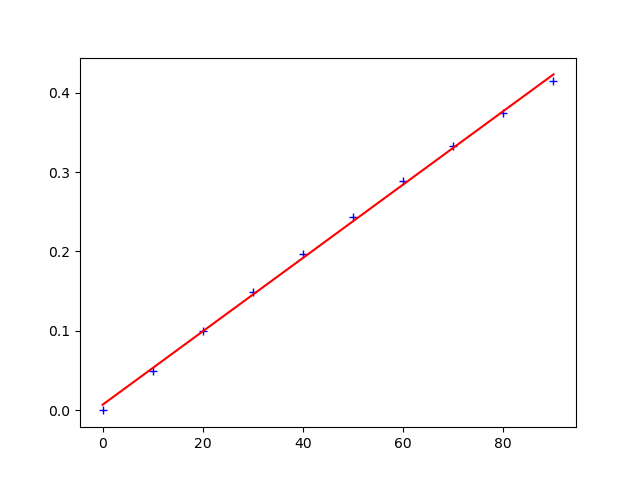

In [5]:
plot(winds, angles, '+b')
x = np.array(winds)
plot(x, regress.intercept + regress.slope*np.array(x), 'r', label='fitted line')

# Sensitivity Analysis

In [6]:
def test_whorl_nb_root():
    ws = [(0,0,0),(1,0,0),(1,1,0),(1,1,1)]

    stiff = 100.
    height = 2.5 # before it was 2m
    stem_mass = 0.1
    wind_force = 10.

    data = []    
    for nb in range(2,20,2):
        for i, w in enumerate(ws):
            br = whorls(whorl=w, nb_root=nb)
            a = mechanic.mechanics(
                br, wind_force=wind_force, 
                stem_mass=float(stem_mass),
                stem_height=float(height),
                stalk_stiffness=float(stiff))            
            data.append((nb, i, degrees(a[0])))
    
    df = pd.DataFrame.from_records(
        data, 
        columns=['#roots per whorl', '#whorls', 'angle']
        )
    return df

In [7]:
df = test_whorl_nb_root()

Solver elts:  [<braceroot.mechanic.Weight object at 0x1a0e74ee0>, <braceroot.mechanic.Wind object at 0x1a0e745b0>, <braceroot.mechanic.Stalk object at 0x1a0e74e80>]
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Weight Force =  Vector3(0,0,-0.981)
Weight Moment =  Vector3(-0,0.86709,0)
Wind Force =  Vector3(10,0,0)
Wind Moment =  Vector3(0,8.83883,0)
Stalk Moment =  Vector3(0,-78.5398,-0)
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Weight Force =  Vector3(0,0,-0.981)
Weight Moment =  Vector3(-0,0.86709,0)
Wind Force =  Vector3(10,0,0)
Wind Moment =  Vector3(0,8.83883,0)
Stalk Moment =  Vector3(0,-78.5398,-0)
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Weight Force =  Vector3(0,0,-0.981)
Weight Moment =  Vector3(-0,0.86709,0)
Wind Force =  Vector3(10,0,0)
Wind Moment =  Vector3(0,8.83883,0)
Stalk Moment =  Vector3(0,-78.5398,-0)
Theta =  0.7853981751007929
Theta =  0.7853

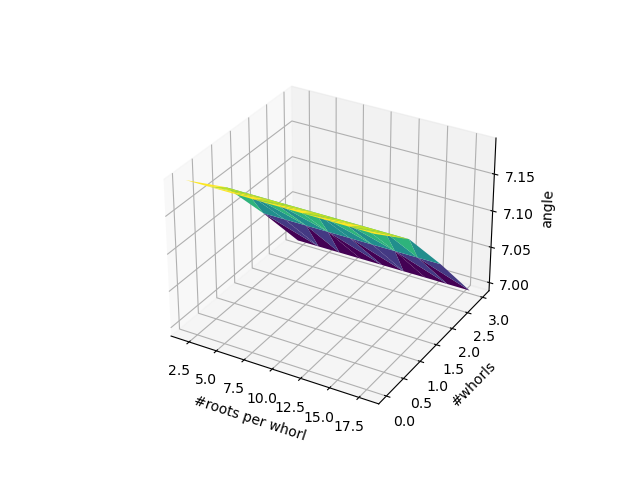

In [12]:
plot_surface(df)

# Test Whorl parameters

In [13]:
def test_whorl_param1():
    stiff = 100.
    height = 2.5 # before it was 2m
    stem_mass = 0.1
    wind_force = 10.    
    
    nb_whorl = 1
    nb_roots=5
    root_diameters = 0.03
    root_length = 0.15
    whorl_heights = np.linspace(0.01,0.08,10)
    root_angles = np.linspace(100, 170,10)
    root_stiffness=np.linspace(50,800, 10)
    
    # prodct between height, angle and stiffness
    # 1. height / angle 
    rstiff = 300.

    data = []
    for root_height, root_angle in product(whorl_heights, root_angles):
        rh = float(root_height)
        ra = float(root_angle)
        length = rh / cos(radians(180.-ra))
        visible_ratio = length/root_length
        br = brace_root.brace_roots(
            nb_whorl=nb_whorl,                      
            whorl_heights=[rh],
            nb_root=[nb_roots],
            root_angle=[ra],
            root_length=[root_length],
            visible_ratio=[visible_ratio],
            root_diameter= [root_diameters],
            root_stiffness=[rstiff]
            )
        a = mechanic.mechanics(
            br, wind_force=wind_force, 
            stem_mass=float(stem_mass),
            stem_height=float(height),
            stalk_stiffness=float(stiff))

        data.append((rh, 180.-ra, degrees(a[0])))
    
    df = pd.DataFrame.from_records(
        data, 
        columns=['root height', 'root angle', 'angle']
        )
    return df

def test_whorl_param2():
    stiff = 100.
    height = 2.5 # before it was 2m
    stem_mass = 0.1
    wind_force = 10.    
    
    nb_whorl = 1
    nb_roots=5
    root_diameters = 0.03
    root_length = 0.15
    whorl_heights = np.linspace(0.01,0.08,10)
    root_angles = np.linspace(100, 170,10)
    root_stiffness=np.linspace(50,800, 10)
    
    # prodct between height, angle and stiffness
    # 1. height / angle 
    rstiff = 300.
    rh = root_height = 0.04
    data = []
    for root_angle, rstiff in product(root_angles, root_stiffness):
        rstiff = float(rstiff)
        ra = float(root_angle)
        length = rh / cos(radians(180.-ra))
        visible_ratio = length/root_length
        br = brace_root.brace_roots(
            nb_whorl=nb_whorl,                      
            whorl_heights=[rh],
            nb_root=[nb_roots],
            root_angle=[ra],
            root_length=[root_length],
            visible_ratio=[visible_ratio],
            root_diameter= [root_diameters],
            root_stiffness=[rstiff]
            )
        a = mechanic.mechanics(
            br, wind_force=wind_force, 
            stem_mass=float(stem_mass),
            stem_height=float(height),
            stalk_stiffness=float(stiff))

        data.append((180-ra, rstiff, degrees(a[0])))
    
    df = pd.DataFrame.from_records(
        data, 
        columns=['root angle', 'root stiffness', 'angle']
        )
    return df

def test_whorl_param3():
    stiff = 100.
    height = 2.5 # before it was 2m
    stem_mass = 0.1
    wind_force = 10.    
    
    nb_whorl = 1
    nb_roots=5
    root_diameters = 0.03
    root_length = 0.15
    whorl_heights = np.linspace(0.01,0.08,10)
    root_angles = np.linspace(100, 170,10)
    root_stiffness=np.linspace(50,800, 10)
    
    # prodct between height, angle and stiffness
    # 1. height / angle 
    rstiff = 300.
    ra = root_angle = 180-45
    data = []

    for root_height, rstiff in product(whorl_heights, root_stiffness):
        rh = float(root_height)
        rstiff = float(rstiff)
        length = rh / cos(radians(180.-ra))
        visible_ratio = length/root_length
        br = brace_root.brace_roots(
            nb_whorl=nb_whorl,                      
            whorl_heights=[rh],
            nb_root=[nb_roots],
            root_angle=[ra],
            root_length=[root_length],
            visible_ratio=[visible_ratio],
            root_diameter= [root_diameters],
            root_stiffness=[rstiff]
            )
        a = mechanic.mechanics(
            br, wind_force=wind_force, 
            stem_mass=float(stem_mass),
            stem_height=float(height),
            stalk_stiffness=float(stiff))

        data.append((rh, rstiff, degrees(a[0])))
    
    df = pd.DataFrame.from_records(
        data, 
        columns=['root height', 'root stiffness', 'angle']
        )
    return df


In [16]:
df1=test_whorl_param1()
df2=test_whorl_param2()
df3=test_whorl_param3()

Solver elts:  [<braceroot.mechanic.Weight object at 0x1a1bbd640>, <braceroot.mechanic.Wind object at 0x1a1bbd220>, <braceroot.mechanic.Stalk object at 0x1a1bbd7c0>, <braceroot.mechanic.BraceRoot object at 0x1a1bbd1f0>, <braceroot.mechanic.BraceRoot object at 0x1a1bbd3a0>, <braceroot.mechanic.BraceRoot object at 0x1a1bbd370>, <braceroot.mechanic.BraceRoot object at 0x1a1bbd250>, <braceroot.mechanic.BraceRoot object at 0x1a1bbd280>]
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Weight Force =  Vector3(0,0,-0.981)
Weight Moment =  Vector3(-0,0.86709,0)
Wind Force =  Vector3(10,0,0)
Wind Moment =  Vector3(0,8.83883,0)
Stalk Moment =  Vector3(0,-78.5398,-0)
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633974483
Theta =  0.7853981633

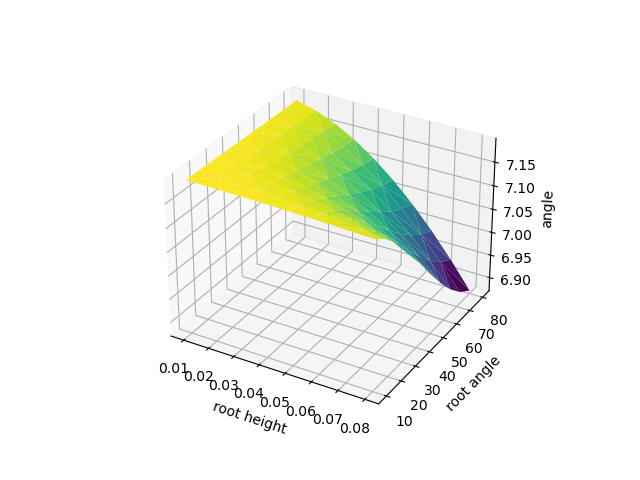

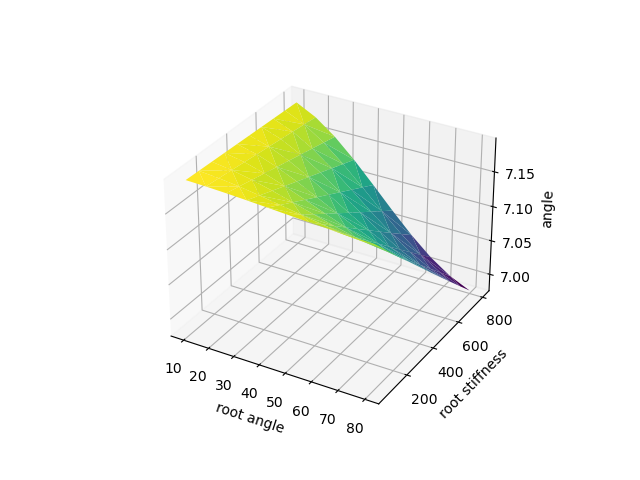

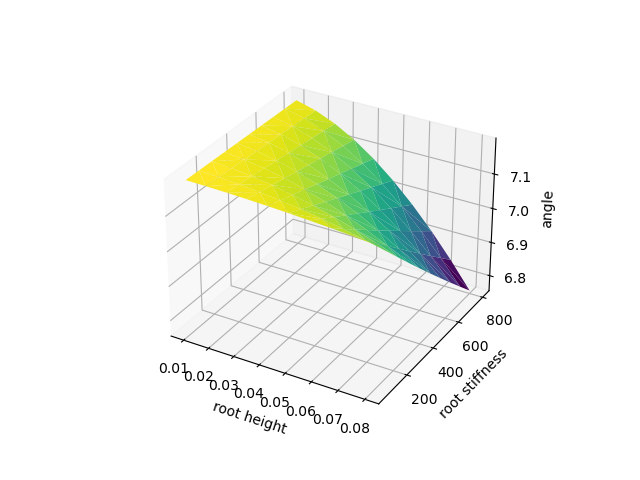

In [17]:
plot_surface(df1)
plot_surface(df2)
plot_surface(df3)
